# Inlcuding Header Files 

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

# Process Data

In [61]:
%run process_data.ipynb import *

In [62]:
X_train , X_test , yTrain , yTest = process_data()

# Decision Tree model

In [63]:
clf = DecisionTreeClassifier()
clf.fit(X_train , yTrain)

DecisionTreeClassifier()

# Finding Optimal Hyperparameters

In [64]:
param_dist = {
     "criterion" : ["gini" , "entropy"],
     "max_depth" : [2 , 4 , 6 , 8],
     "min_samples_leaf": [1 , 2, 3, 4, 5, 6, 7, 8]
 }

In [65]:
grid = GridSearchCV(clf , param_grid= param_dist , cv= 10 , n_jobs= -1)

In [66]:
grid.fit(X_train , yTrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8]})

In [67]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=8)

In [68]:
grid.best_score_

0.9626373626373625

In [69]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1}

# Decision Tree model with Optimal Hyperparameters

we will set max_depth of tree to be 8 and we will use the criterion is gini index with min_samples_leaf of 1

In [70]:
classifier = DecisionTreeClassifier(criterion= "gini", max_depth= 8 , min_samples_leaf= 1 , random_state= 42)
classifier.fit(X_train , yTrain)

DecisionTreeClassifier(max_depth=8, random_state=42)

we will predict the output for the test data

In [71]:
y_pred = classifier.predict(X_test)

# Visualizing the Decision Tree

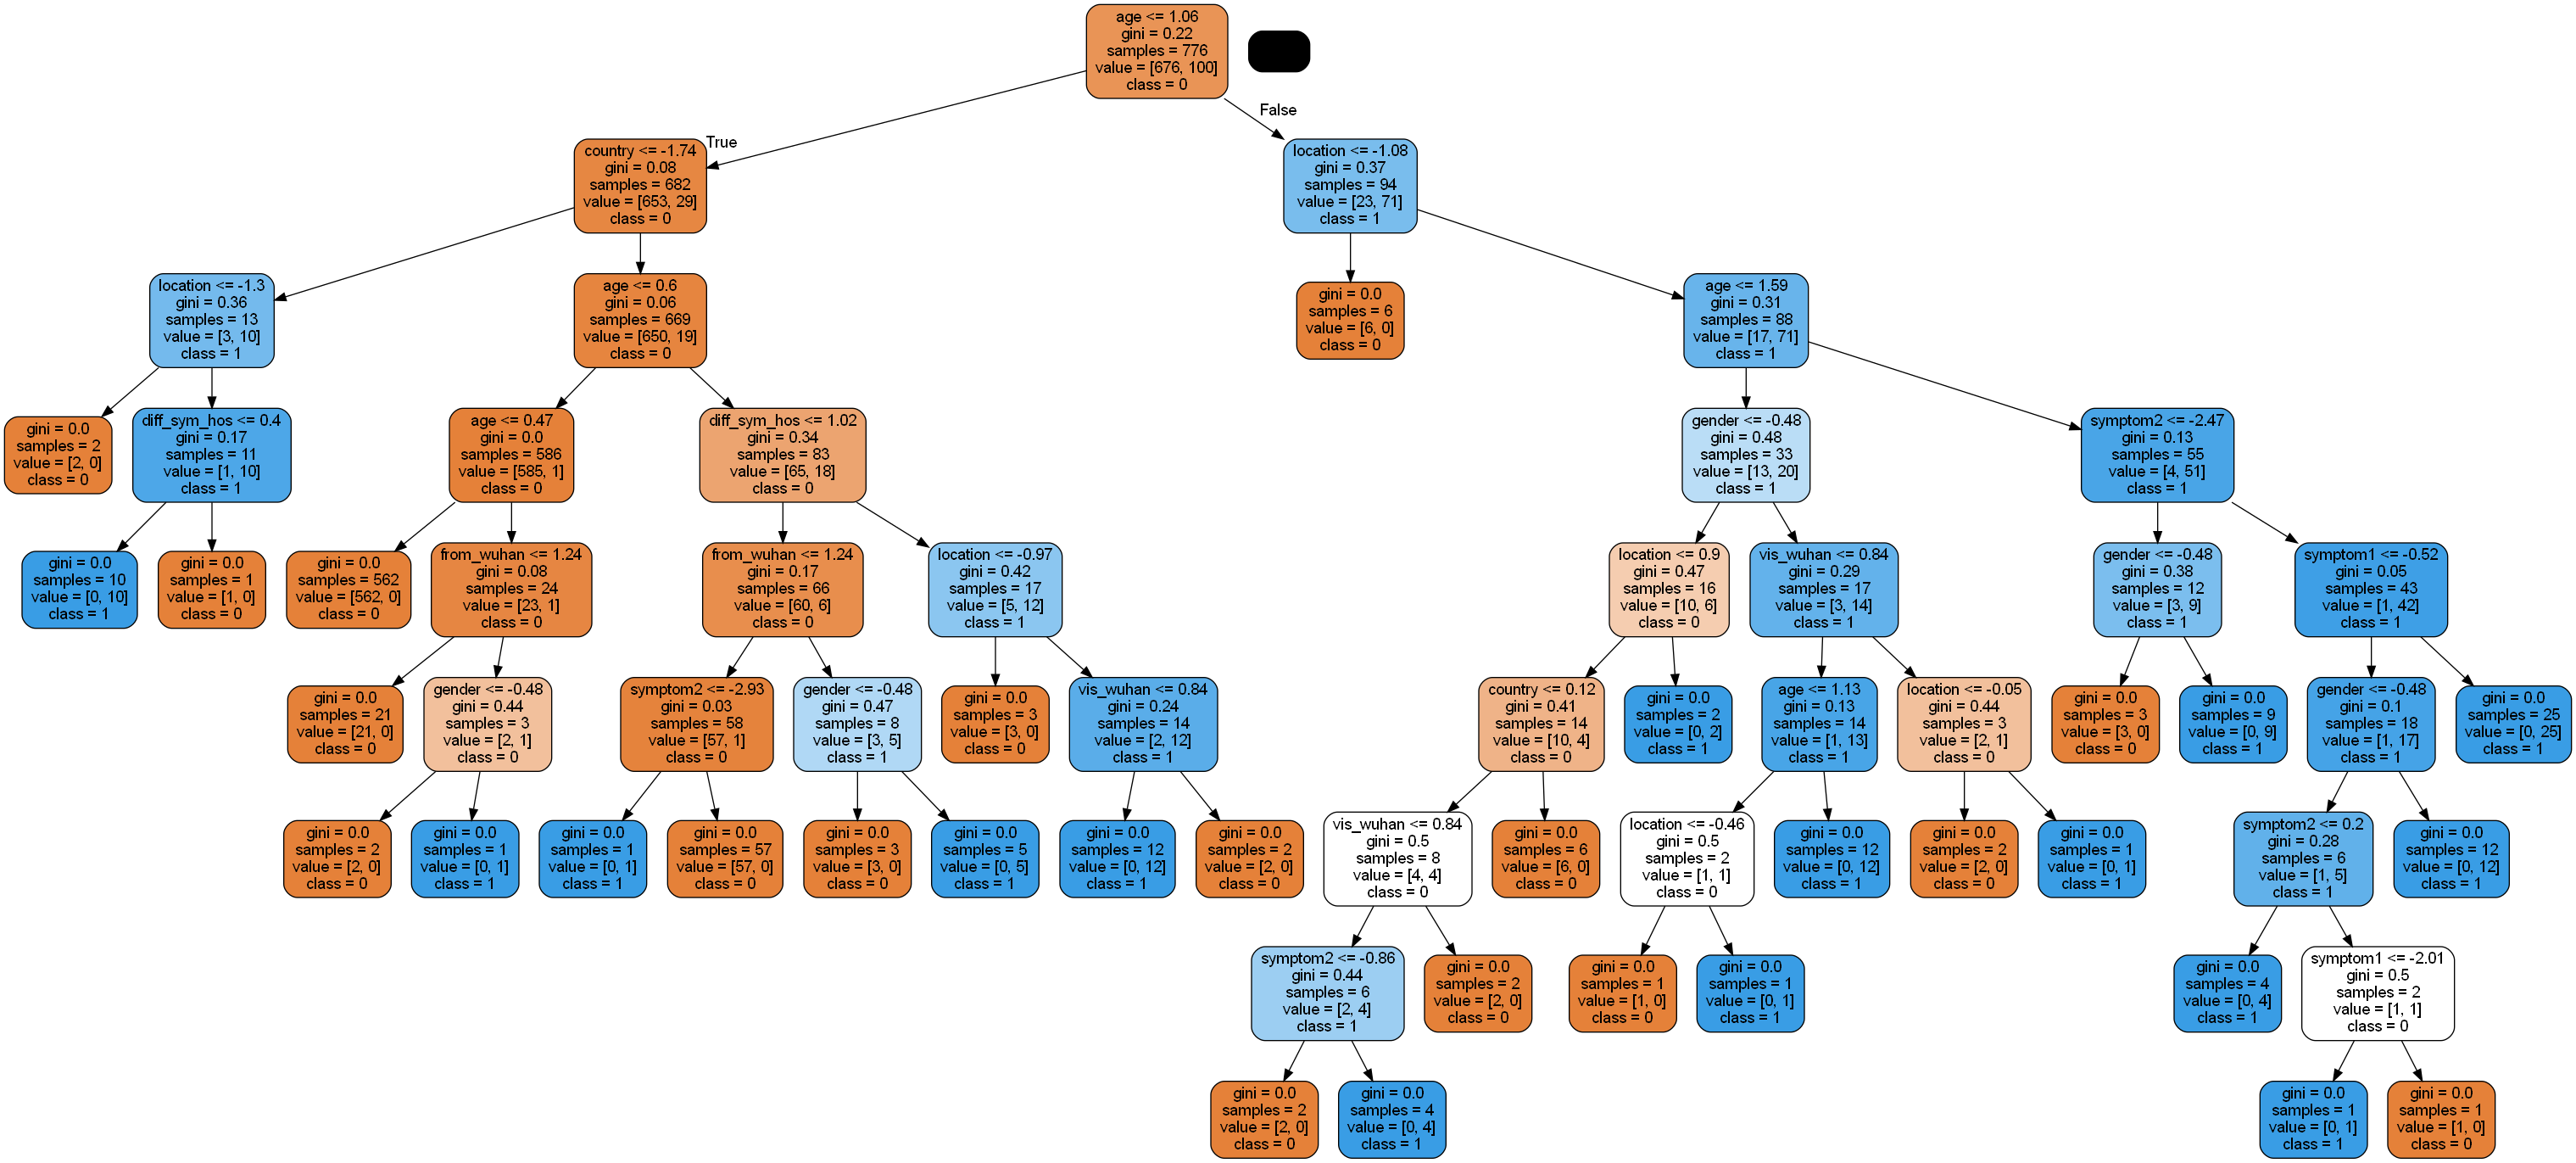

In [72]:
dot_data = StringIO()
feature_cols = ["location" , "country" , "gender" , "age" , "vis_wuhan" , "from_wuhan" , "symptom1" , "symptom2" , "symptom3"
          , "symptom4" , "symptom5" , "symptom6" , "diff_sym_hos"]
export_graphviz(classifier, out_file= dot_data, feature_names = feature_cols,\
                class_names = ["0", "1"],\
                rounded = True, proportion = False, precision = 2, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Decision Tree.png")
Image(graph.create_png())

# Evaluating the model

In [73]:
%run evaluation.ipynb import *

In [74]:
cm , cr = confusion_mat(yTest, y_pred)
print("Confusion matrix\n\n" ,cm , "\n")
print(cr)

Confusion matrix

 [[78  1]
 [ 0  8]] 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        79
           1       0.89      1.00      0.94         8

    accuracy                           0.99        87
   macro avg       0.94      0.99      0.97        87
weighted avg       0.99      0.99      0.99        87



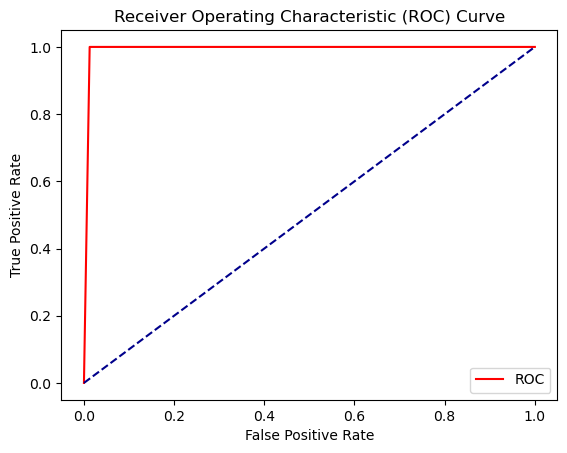

In [75]:
roc_plot(yTest, X_test)

In [76]:
score = roc_score(yTest, X_test)
print("ROC AUC Score: ", score)

ROC AUC Score:  0.9936708860759494
